# EDA(Exploratory data analysis)

## Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

import pickle as pk

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold

from sklearn import metrics

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("df_reduced.csv", delimiter= ";")
df.head()


,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,XP_815234.1:14,5693,XP_815234.1,283,S,406709,0,1,188,-1,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,XP_811525.1:1,5693,XP_811525.1,9,L,339305,0,1,32,-1,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,XP_819902.1:4,5693,XP_819902.1,96,G,295341,0,1,64,-1,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,XP_808204.1:14,5693,XP_808204.1,282,Y,315639,0,1,102,-1,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,XP_820015.1:10,5693,XP_820015.1,242,A,"244573,390576","0,0","1,1",211,-1,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Columns: 300 entries, Info_PepID to feat_esm1b_289
dtypes: float64(290), int64(4), object(6)
memory usage: 28.4+ MB
None


In [7]:
print(df.dtypes)

# Look for a column with a categorical data type or a small number of unique values
for column in df.columns:
    if df[column].nunique() < 10 or df[column].dtype == 'object':
        print(f"Column: {column}, Unique values: {df[column].nunique()}, Data type: {df[column].dtype}")

Info_PepID           object
Info_organism_id      int64
Info_protein_id      object
Info_pos              int64
Info_AA              object
                     ...   
feat_esm1b_285      float64
feat_esm1b_286      float64
feat_esm1b_287      float64
feat_esm1b_288      float64
feat_esm1b_289      float64
Length: 300, dtype: object
Column: Info_PepID, Unique values: 3882, Data type: object
Column: Info_organism_id, Unique values: 1, Data type: int64
Column: Info_protein_id, Unique values: 407, Data type: object
Column: Info_AA, Unique values: 20, Data type: object
Column: Info_epitope_id, Unique values: 7505, Data type: object
Column: Info_nPos, Unique values: 19, Data type: object
Column: Info_nNeg, Unique values: 19, Data type: object
Column: Class, Unique values: 2, Data type: int64


## Checking Missing Values:

In [8]:
# Check for missing values
missing_data = df.isnull().sum()
missing_data_percentage = (df.isnull().mean() * 100)

# Print variables with missing data along with their percentage
print("Missing data in each column:")
print(missing_data[missing_data > 0].sort_values(ascending=False))
print("\nPercentage of missing data in each column:")
print(missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False))

Missing data in each column:
feat_esm1b_148    11170
feat_esm1b_0         14
feat_esm1b_137       14
feat_esm1b_139       14
feat_esm1b_141       14
                  ...  
feat_esm1b_181       11
feat_esm1b_270       10
feat_esm1b_114       10
feat_esm1b_277       10
feat_esm1b_119        9
Length: 290, dtype: int64

Percentage of missing data in each column:
feat_esm1b_148    90.066118
feat_esm1b_0       0.112885
feat_esm1b_137     0.112885
feat_esm1b_139     0.112885
feat_esm1b_141     0.112885
                    ...    
feat_esm1b_181     0.088695
feat_esm1b_270     0.080632
feat_esm1b_114     0.080632
feat_esm1b_277     0.080632
feat_esm1b_119     0.072569
Length: 290, dtype: float64


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 300 columns.
There are 290 columns that have missing values.


,Missing Values,% of Total Values
feat_esm1b_148,11170,90.1
feat_esm1b_0,14,0.1
feat_esm1b_137,14,0.1
feat_esm1b_139,14,0.1
feat_esm1b_141,14,0.1
...,...,...
feat_esm1b_181,11,0.1
feat_esm1b_270,10,0.1
feat_esm1b_114,10,0.1
feat_esm1b_277,10,0.1


## Imputing missing values with mean:

In [12]:
'''
Impute missing values for column grade
'''


# Fill missing values with median of each column
df_filled = df.fillna(df.mean())

# Optionally, check for any remaining missing values
print(df_filled.isnull().sum())

C:\Users\rocke\AppData\Local\Temp\ipykernel_19464\3091763127.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


Info_PepID          0
Info_organism_id    0
Info_protein_id     0
Info_pos            0
Info_AA             0
                   ..
feat_esm1b_285      0
feat_esm1b_286      0
feat_esm1b_287      0
feat_esm1b_288      0
feat_esm1b_289      0
Length: 300, dtype: int64


## Droping the high missing value column:

In [13]:
'''
Delete the column feat_esm1b_148
'''

df = df.drop(['feat_esm1b_148'], axis=1)
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,XP_815234.1:14,5693,XP_815234.1,283,S,406709,0,1,188,-1,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,XP_811525.1:1,5693,XP_811525.1,9,L,339305,0,1,32,-1,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,XP_819902.1:4,5693,XP_819902.1,96,G,295341,0,1,64,-1,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,XP_808204.1:14,5693,XP_808204.1,282,Y,315639,0,1,102,-1,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,XP_820015.1:10,5693,XP_820015.1,242,A,"244573,390576","0,0","1,1",211,-1,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564


## Spliting Df into info and feature column for feature engineering:

In [14]:
# Assuming 'Info_' prefix for information variables and 'feat_' for feature variables
info_columns = [col for col in df.columns if col.startswith('Info_')]
feature_columns = [col for col in df.columns if col.startswith('feat_')]

# DataFrames for info and feature variables
df_info = df[info_columns]
df_features = df[feature_columns]

# Display the first few rows of the feature DataFrame
print(df_features.head())

   feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
0     -0.050457      0.350820      0.081111      0.292722     -0.046843   
1      0.200686     -0.200323     -0.367348     -0.286893     -0.289697   
2      0.089208      0.074643      0.005332      0.304287     -0.093382   
3      0.150502      0.247198      0.155206      0.029653      0.117658   
4      0.247700     -0.045094     -0.017004     -0.282002     -0.001418   

   feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  ...  \
0     -0.316361      0.205464     -0.164362     -0.125390     -0.156784  ...   
1     -0.061222     -0.441129      0.103984     -0.336376     -0.232301  ...   
2     -0.150377     -0.202398     -0.302996     -0.405301     -0.347159  ...   
3     -0.185720     -0.206774      0.056524     -0.077987      0.028505  ...   
4     -0.162899     -0.159904     -0.414519     -0.513792      0.041919  ...   

   feat_esm1b_280  feat_esm1b_281  feat_esm1b_282  feat_esm1b_283  \

## Checking various feature attributes

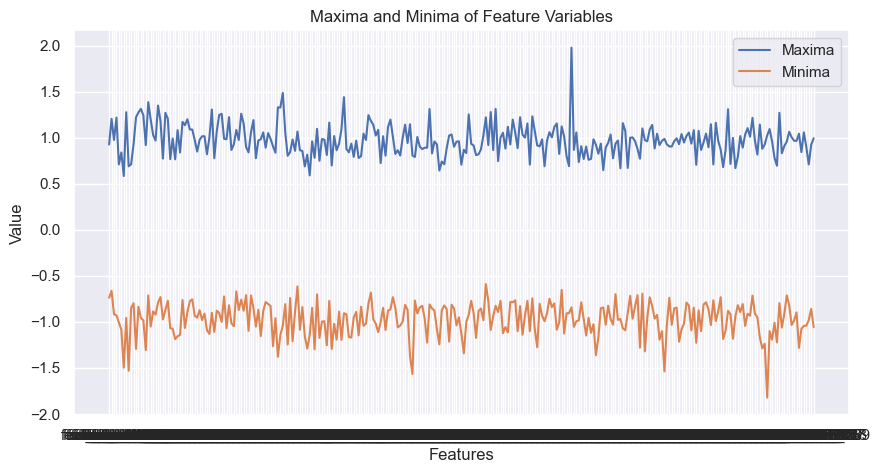

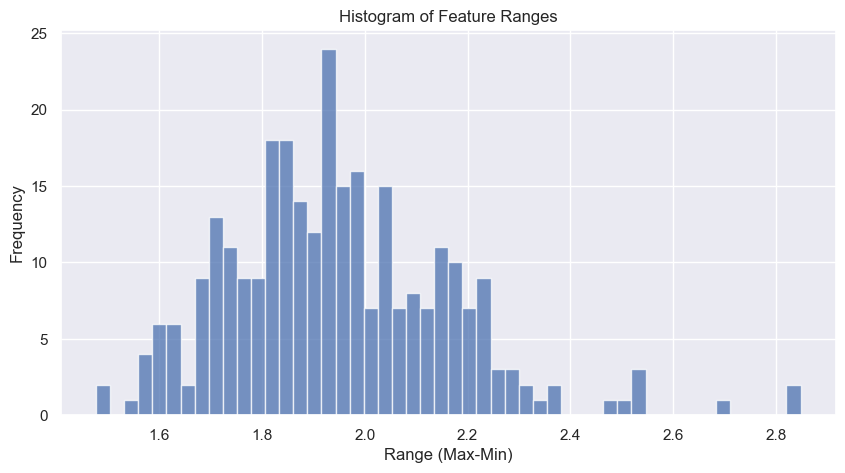

In [15]:
import matplotlib.pyplot as plt

# Calculate maxima and minima for each feature
max_values = df_features.max()
min_values = df_features.min()

# Plot maxima and minima
plt.figure(figsize=(10, 5))
plt.plot(max_values, label='Maxima')
plt.plot(min_values, label='Minima')
plt.title('Maxima and Minima of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate and plot ranges
ranges = max_values - min_values
plt.figure(figsize=(10, 5))
plt.hist(ranges, bins=50, alpha=0.75)
plt.title('Histogram of Feature Ranges')
plt.xlabel('Range (Max-Min)')
plt.ylabel('Frequency')
plt.show()

## Class counts with plotting:

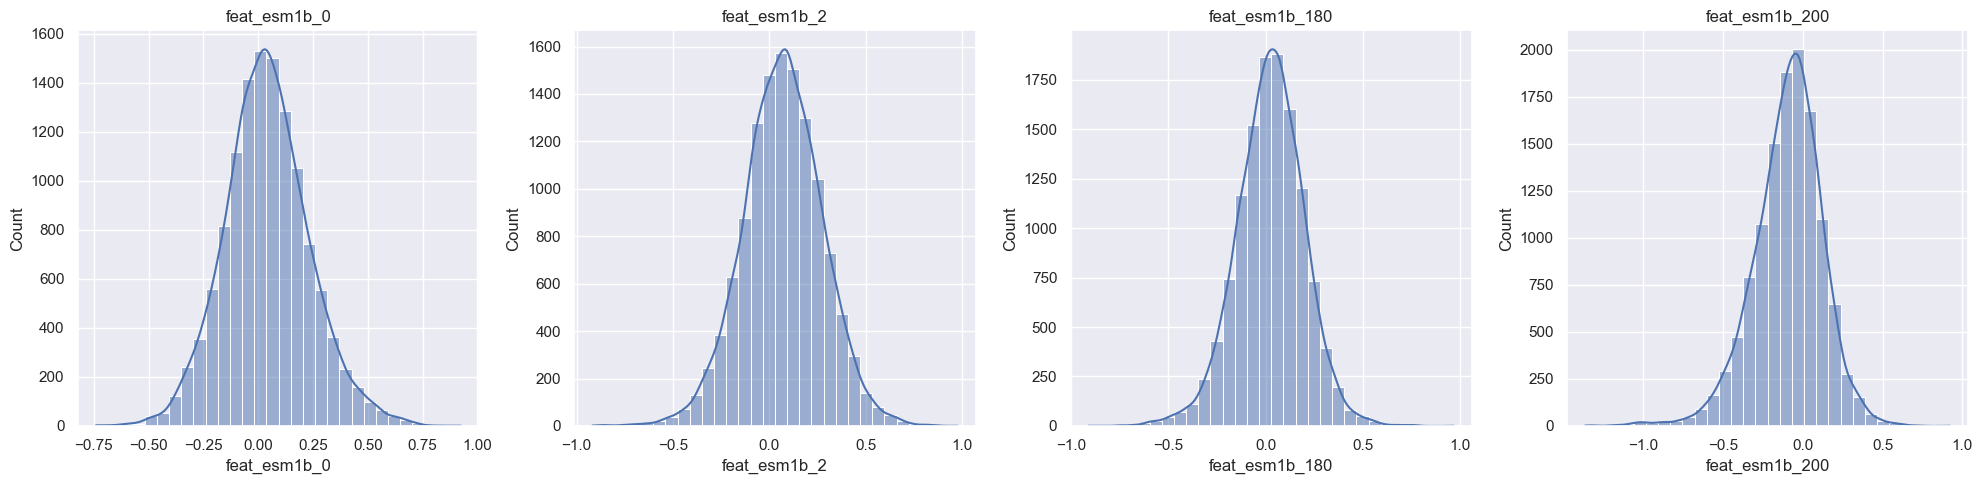

(       Info_organism_id      Info_pos  Info_cluster         Class  \
 count           12402.0  12402.000000  12402.000000  12402.000000   
 mean             5693.0    446.806160    139.667634     -0.970005   
 std                 0.0    648.570623     77.944928      0.243095   
 min              5693.0      1.000000      7.000000     -1.000000   
 25%              5693.0    126.000000     70.000000     -1.000000   
 50%              5693.0    252.000000    145.000000     -1.000000   
 75%              5693.0    456.000000    205.000000     -1.000000   
 max              5693.0   4839.000000    283.000000      1.000000   
 
        feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
 count  12402.000000  12402.000000  12402.000000  12402.000000  12402.000000   
 mean       0.040924      0.150334      0.068379      0.077347      0.023808   
 std        0.194564      0.180784      0.205984      0.183870      0.193400   
 min       -0.739531     -0.664717     -0.918128

In [16]:
# Basic statistics for numeric columns
stats = df_filled.describe()

# Checking class balance
class_counts = df['Class'].value_counts(normalize=True) * 100
# Visualizing the distribution of a few features
sample_features = ['feat_esm1b_0', 'feat_esm1b_2', 'feat_esm1b_180', 'feat_esm1b_200']
plt.figure(figsize=(20, 5))
for i, feature in enumerate(sample_features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df_filled[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

stats, class_counts

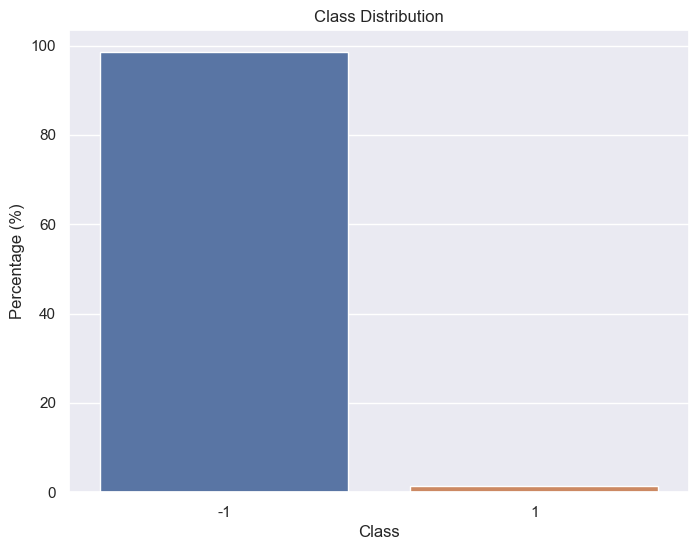

-1    98.500242
 1     1.499758
Name: Class, dtype: float64

In [17]:
# Checking class balance
class_counts = df['Class'].value_counts(normalize=True) * 100
# Visualizing class balance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.show()
class_counts

## GroupShuffleSplit:

In [17]:

# Make sure 'df_filled' is used when creating the lists of columns
filled_info_columns = [col for col in df_filled.columns if col.startswith('Info_')]
filled_feature_columns = [col for col in df_filled.columns if col.startswith('feat_')]

# Create DataFrames for info and feature variables using 'df_filled'
df_info_filled = df_filled[filled_info_columns]
df_features_filled = df_filled[filled_feature_columns]

# Now, df_info_filled and df_features_filled contain the respective columns from df_filled
# Display the first few rows of the feature DataFrame
print(df_features_filled.head())


   feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
0     -0.050457      0.350820      0.081111      0.292722     -0.046843   
1      0.200686     -0.200323     -0.367348     -0.286893     -0.289697   
2      0.089208      0.074643      0.005332      0.304287     -0.093382   
3      0.150502      0.247198      0.155206      0.029653      0.117658   
4      0.247700     -0.045094     -0.017004     -0.282002     -0.001418   

   feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  ...  \
0     -0.316361      0.205464     -0.164362     -0.125390     -0.156784  ...   
1     -0.061222     -0.441129      0.103984     -0.336376     -0.232301  ...   
2     -0.150377     -0.202398     -0.302996     -0.405301     -0.347159  ...   
3     -0.185720     -0.206774      0.056524     -0.077987      0.028505  ...   
4     -0.162899     -0.159904     -0.414519     -0.513792      0.041919  ...   

   feat_esm1b_280  feat_esm1b_281  feat_esm1b_282  feat_esm1b_283  \

In [18]:
from sklearn.model_selection import GroupShuffleSplit

# Define the splitter
splitter = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Assume 'Info_cluster' is the column for grouping
# and 'Class' is the target variable
for train_idx, test_idx in splitter.split(df_filled, groups=df_filled['Info_cluster']):
    train_set = df_filled.iloc[train_idx]
    test_set = df_filled.iloc[test_idx]

# Check class balance in each set
print("Class balance in training set:")
print(train_set['Class'].value_counts(normalize=True))

print("Class balance in testing set:")
print(test_set['Class'].value_counts(normalize=True))


Class balance in training set:
-1    0.986251
 1    0.013749
Name: Class, dtype: float64
Class balance in testing set:
-1    0.98147
 1    0.01853
Name: Class, dtype: float64


## Detect and handle outliers

In [19]:
from sklearn.ensemble import IsolationForest



# Isolation Forest for outlier detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=1)
outliers = iso_forest.fit_predict(df_features_filled)

# Display outlier detection results
outlier_indices = df_features_filled[outliers == -1].index
print("Indices of detected outliers:", outlier_indices)


Indices of detected outliers: Int64Index([    1,    15,    22,    27,    36,    65,    73,    85,    87,
               88,
            ...
            12313, 12317, 12318, 12348, 12355, 12366, 12369, 12371, 12379,
            12388],
           dtype='int64', length=1241)


In [20]:
from sklearn.ensemble import IsolationForest

# Assuming numerical features are stored in 'df_features'
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(train_set[filled_feature_columns])  # use only training data

# Display outlier detection results
outlier_indices = train_set[outliers == -1].index
print("Indices of detected outliers:", outlier_indices)





Indices of detected outliers: Int64Index([   15,    36,    65,    73,    87,    88,    91,   115,   116,
              132,
            ...
            12268, 12281, 12308, 12309, 12313, 12340, 12348, 12355, 12371,
            12379],
           dtype='int64', length=917)


In [21]:
print(len(train_set))
print(len(outliers))


9164
9164


In [22]:
# Filter out the outliers
train_set = train_set[outliers != -1]


In [23]:
print(len(train_set))
print(len(outliers))


8247
9164


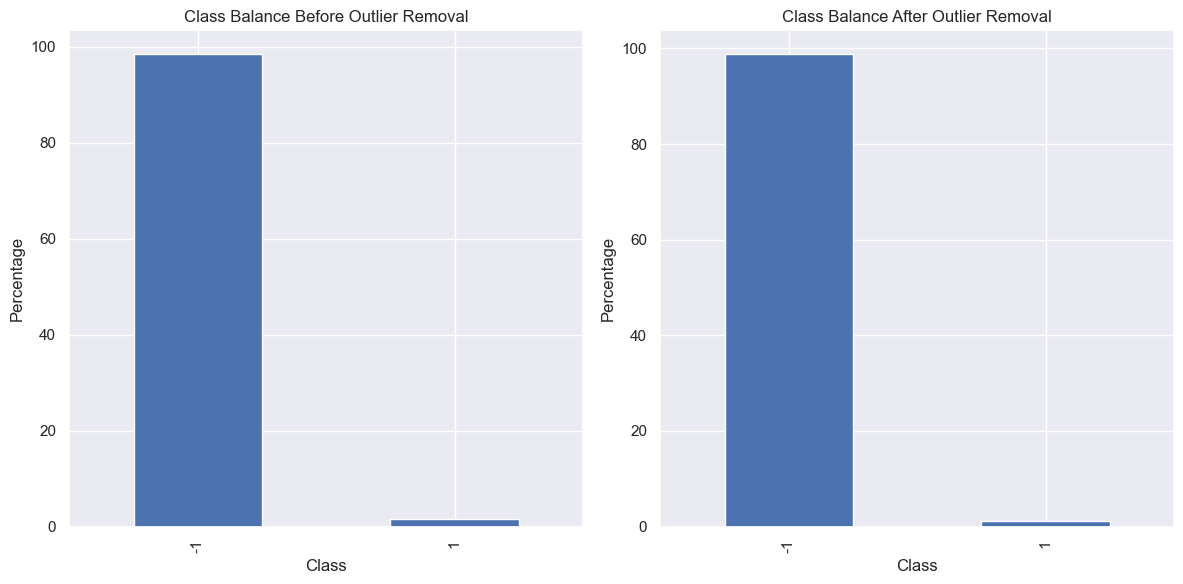

In [24]:
import matplotlib.pyplot as plt

# Assuming 'Class' is the target variable column in your train_set DataFrame
# And assuming 'outliers' is the array of predictions from IsolationForest

# Plot class balance before removing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
(df_filled['Class'].value_counts(normalize=True) * 100).plot(kind='bar', title='Class Balance Before Outlier Removal')
plt.ylabel('Percentage')
plt.xlabel('Class')



plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
(train_set['Class'].value_counts(normalize=True) * 100).plot(kind='bar', title='Class Balance After Outlier Removal')
plt.ylabel('Percentage')
plt.xlabel('Class')

plt.tight_layout()
plt.show()

## Feture scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming 'filled_feature_columns' is a list of column names that you want to scale.
# Replace 'filled_feature_columns' with the actual list of columns you are scaling.

# Fit the scaler on the training set and transform the training set.
train_set.loc[:, filled_feature_columns] = scaler.fit_transform(train_set.loc[:, filled_feature_columns])

# Transform the test set using the fitted scaler from the training set.
test_set.loc[:, filled_feature_columns] = scaler.transform(test_set.loc[:, filled_feature_columns])


C:\Users\rocke\AppData\Local\Temp\ipykernel_19464\1822530049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.loc[:, filled_feature_columns] = scaler.transform(test_set.loc[:, filled_feature_columns])


## Saving the split data

In [26]:
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

## Feature selection with filter method
To perform feature selection, we'll use a simple filter method such as Information Gain, calculated by training decision stumps for each feature and assessing the reduction in entropy:

In [53]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif



# Separate the features and target
X = df_filled.drop(['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos', 'Info_AA', 'Info_epitope_id', 'Info_nPos', 'Info_nNeg','Class','feat_esm1b_148'], axis=1)  
y = df_filled['Class']

# Calculate Information Gain for each feature
info_gains = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame for visualization
features_info_gain = pd.DataFrame(info_gains, index=X.columns, columns=['Information Gain'])

# Sort features by Information Gain
features_info_gain.sort_values(by='Information Gain', ascending=False, inplace=True)

# Print or plot the Information Gain values to decide on a threshold
print(features_info_gain)


                Information Gain
Info_cluster            0.032535
feat_esm1b_202          0.008467
feat_esm1b_76           0.007190
feat_esm1b_240          0.006962
feat_esm1b_195          0.006909
...                          ...
feat_esm1b_106          0.000000
feat_esm1b_110          0.000000
feat_esm1b_207          0.000000
feat_esm1b_263          0.000000
feat_esm1b_87           0.000000

[290 rows x 1 columns]


## Step 2: Model Development (Pre-Model)
Now, using the selected features and preprocessed data, fit a basic Decision Tree model. Ensure to split the data respecting the Info_cluster to prevent data leakage.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 'Info_cluster' is the column for data grouping
# Split data into training and validation sets
train_idx, valid_idx = next(GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42).split(X, groups=df_filled['Info_cluster']))

X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

# Fit a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and assess accuracy
y_pred = dt.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.97


## Data preparation for class imbalance:

In [55]:

from sklearn.model_selection import train_test_split



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Undersampling with majority class

In [56]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Now train a classifier on the undersampled data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)
predictions = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

          -1       1.00      0.89      0.94      2447
           1       0.08      0.71      0.14        34

    accuracy                           0.88      2481
   macro avg       0.54      0.80      0.54      2481
weighted avg       0.98      0.88      0.93      2481



### Random oversampling with Minority Class

In [57]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Train a classifier on the oversampled data
clf_over = RandomForestClassifier(random_state=42)
clf_over.fit(X_oversampled, y_oversampled)
predictions_over = clf_over.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions_over))


              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2447
           1       0.67      0.18      0.28        34

    accuracy                           0.99      2481
   macro avg       0.83      0.59      0.64      2481
weighted avg       0.98      0.99      0.98      2481



## Specify class weights explicitly

In [58]:
# Specify class weights explicitly
class_weights = {-1: 1, 1: 10}  # Adjust the weights as necessary based on the class imbalance

# Train a cost-sensitive classifier
clf_cost = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf_cost.fit(X_train, y_train)
predictions_cost = clf_cost.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions_cost))



              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2447
           1       1.00      0.03      0.06        34

    accuracy                           0.99      2481
   macro avg       0.99      0.51      0.53      2481
weighted avg       0.99      0.99      0.98      2481



In [59]:
# Specify class weights explicitly
class_weights = {-1: 1, 1: 20}  # Adjust the weights as necessary based on the class imbalance

# Train a cost-sensitive classifier
clf_cost = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf_cost.fit(X_train, y_train)
predictions_cost = clf_cost.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions_cost))


              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2447
           1       0.00      0.00      0.00        34

    accuracy                           0.99      2481
   macro avg       0.49      0.50      0.50      2481
weighted avg       0.97      0.99      0.98      2481



C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rocke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
# Specify class weights explicitly
class_weights = {-1: 1, 1: 30}  # Adjust the weights as necessary based on the class imbalance

# Train a cost-sensitive classifier
clf_cost = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf_cost.fit(X_train, y_train)
predictions_cost = clf_cost.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions_cost))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2447
           1       0.00      0.00      0.00        34

    accuracy                           0.99      2481
   macro avg       0.49      0.50      0.50      2481
weighted avg       0.97      0.99      0.98      2481



In [61]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Create a dictionary mapping class labels to class weights
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print(class_weights_dict)


{-1: 0.5077797113317637, 1: 32.63486842105263}


In [62]:
# Specify class weights explicitly
class_weights = {-1: .5, 1: 33}  # Adjust the weights as necessary based on the class imbalance

# Train a cost-sensitive classifier
clf_cost = RandomForestClassifier(random_state=42, class_weight=class_weights)
clf_cost.fit(X_train, y_train)
predictions_cost = clf_cost.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions_cost))


              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2447
           1       1.00      0.03      0.06        34

    accuracy                           0.99      2481
   macro avg       0.99      0.51      0.53      2481
weighted avg       0.99      0.99      0.98      2481



# Building a Pipeline:

### Test before building main pipeline

In [40]:
from sklearn.model_selection import GridSearchCV

# Define a grid of parameters to search
param_grid = {
    'feature_selector__k': [5, 10, 15],  # Trying different numbers of top features
    'classifier__n_estimators': [100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20]  # Maximum depth of each tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'feature_selector__k': 10}
Best cross-validation score: 0.99


## Evaluating Pipeline

 working with class imbalance again: ### Using Smote

In [64]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE method
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [65]:
from sklearn.ensemble import RandomForestClassifier

# Define the classifier with class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with SMOTE resampled data
clf.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test data
y_pred = clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, zero_division=0)

# Print classification report
print(report)

# Optionally, print additional metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))  # Assuming y_test is binary with {0, 1}


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2447
           1       1.00      0.79      0.89        34

    accuracy                           1.00      2481
   macro avg       1.00      0.90      0.94      2481
weighted avg       1.00      1.00      1.00      2481

Confusion Matrix:
[[2447    0]
 [   7   27]]
ROC AUC Score:
1.0


# Final Pipeline and Hyper Tuning:
This is the final pipeline i used in my coursework. And later on that part there is also a Logistic Regression model which conducted for only checking purpose:

In [66]:
from sklearn.model_selection import GroupShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, loguniform
 
# Defineing groups for GroupShuffleSplit
groups_train = X_train_smote['Info_cluster']
groups_test = X_test['Info_cluster']
 
                    
# Define preprocessing steps
preprocessor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest())  # Example feature selection step
])
 
# Define model
model = RandomForestClassifier(random_state=42)
 
# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', model)
])
 
# Define parameter grid
param_grid = {
    'preprocessor__selector__k': randint(1, len(X_train_smote.columns)),  # Number of features to select
    'clf__n_estimators': [100, 200, 500],
    'clf__max_depth': [4, 6, 8, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
 
# Set up the GroupShuffleSplit cross-validation iterator
cv = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
 
# Perform randomized search with the grouped cross-validation
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=cv, scoring='accuracy', n_iter=50, n_jobs=-1, random_state=42)
random_search.fit(X_train_smote, y_train_smote, groups=groups_train)
 
# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)
 
# Evaluate the final model on the test set
y_pred_test = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Best parameters:  {'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100, 'preprocessor__selector__k': 53}
Best accuracy:  0.8398221711790125
Test accuracy: 0.9379282547359935


In [67]:
# Best model after random search
best_model = random_search.best_estimator_
print(best_model)



Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('selector', SelectKBest(k=53))])),
                ('clf',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=2,
                                        random_state=42))])


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test data
y_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, zero_division=0)

# Print classification report
print(report)

# Optionally, print additional metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))  # Assuming y_test is binary with {0, 1}

              precision    recall  f1-score   support

          -1       0.99      0.94      0.97      2447
           1       0.13      0.65      0.22        34

    accuracy                           0.94      2481
   macro avg       0.56      0.79      0.59      2481
weighted avg       0.98      0.94      0.96      2481

Confusion Matrix:
[[2305  142]
 [  12   22]]
ROC AUC Score:
0.9212360874059472


## Logistic Regression model trial (checking purpose:not used)

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
import traceback

# Assuming df_scaled is your DataFrame and the target variable is 'Class'



# Define model
model = LogisticRegression()

# Define evaluation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search space
space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],  # Adjusted penalty options
    'C': loguniform(1e-5, 100)
}

# Define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1, error_score='raise')

try:
    # Execute search
    result = search.fit(X_train_smote[:1000], y_train_smote[:1000])
    
    # Summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
except Exception as e:
    print("Error occurred during fitting:")
    print(traceback.format_exc())


Best Score: 0.9873333333333333
Best Hyperparameters: {'C': 2.0674811789304073, 'penalty': 'l2', 'solver': 'liblinear'}


## Grid_search
not used in model.

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
    
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=3, scoring='f1', n_jobs=-1)

# Perform the search on the resampled data
grid_search.fit(X_train_smote[:2000], y_train_smote[:2000])



RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)


## Testing

In [69]:
df_reduced_holdout= pd.read_csv("df_reduced_holdout.csv", delimiter= ";")
df_reduced_holdout.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,feat_esm1b_0,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
1,CAA40511.1:2,5693,CAA40511.1,41,E,2.821100e+05,0,1,5,-0.031116,...,0.214877,0.137500,-0.135050,-0.136367,0.173880,-0.265647,-0.293195,-0.149761,0.021402,-0.122198
2,CAA40511.1:2,5693,CAA40511.1,42,L,2.821100e+05,0,1,5,-0.073993,...,-0.067653,0.065793,0.029232,-0.081416,-0.028961,-0.201758,-0.383026,-0.096947,0.044942,-0.157475
3,CAA40511.1:2,5693,CAA40511.1,43,F,2.821100e+05,0,1,5,0.161300,...,0.119101,-0.062131,0.027468,-0.066240,-0.089264,0.056728,-0.150139,-0.111919,0.193595,0.068565
4,CAA40511.1:2,5693,CAA40511.1,44,K,2.821100e+05,0,1,5,-0.046168,...,-0.057348,0.065678,0.086570,-0.251700,0.181179,0.102191,-0.486585,-0.096296,0.133881,-0.154329
5,CAA40511.1:2,5693,CAA40511.1,45,R,2.821104e+11,"0,0","1,1",5,-0.120631,...,-0.185599,0.046469,0.319074,-0.250364,0.491342,0.166405,-0.323230,-0.030294,0.284883,-0.400859


In [70]:
X_train_smote.head()

,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,119,0.153547,0.190196,-0.038224,0.167686,0.078066,-0.232488,-0.238118,-0.023775,-0.184440,...,0.013428,0.195669,-0.194150,-0.285858,0.451429,-0.114359,-0.181277,-0.300970,-0.126718,0.330783
1,187,0.095246,0.215163,-0.125311,0.201589,0.058128,-0.338364,-0.074572,-0.205421,-0.197323,...,0.355528,0.040724,0.021104,-0.315080,0.363105,-0.190192,-0.022343,-0.447263,0.088829,0.083649
2,177,0.019442,0.163218,0.196599,-0.021540,0.031182,-0.241772,-0.019116,-0.228008,0.033422,...,-0.197175,-0.203147,-0.048926,-0.095955,-0.080164,0.036010,0.143280,-0.139473,-0.285381,0.262839
3,13,0.127339,0.012668,0.014856,-0.072464,0.228608,-0.118052,0.192426,0.196123,-0.259695,...,-0.039694,0.000850,-0.074751,-0.181833,0.405102,-0.238949,0.083006,-0.048539,-0.073410,0.139910
4,202,0.287696,-0.151007,0.165676,-0.275385,0.190052,-0.288722,-0.316326,0.170549,-0.524922,...,0.049412,-0.229828,-0.147787,-0.199781,-0.178439,0.453211,-0.105455,0.318256,-0.329207,-0.356678


In [71]:
X_test.head()

,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
2316,153,-0.144121,0.297322,0.086438,-0.004532,-0.149820,0.165237,-0.248257,0.168557,-0.234881,...,0.031704,-0.196374,-0.556966,-0.329921,-0.154133,-0.042473,-0.298673,-0.283601,-0.561944,0.034661
1121,119,0.115623,0.130851,-0.298208,0.248833,0.018099,-0.268165,-0.146387,-0.102980,-0.376918,...,0.373460,0.122083,0.194325,-0.240913,0.166677,-0.083255,-0.131591,-0.273049,-0.200193,0.072942
4560,242,-0.114102,0.126583,0.007781,0.246792,-0.301714,0.086372,-0.004170,-0.175821,0.006704,...,0.049184,0.160755,-0.459799,0.154984,-0.293537,0.066431,-0.150039,-0.120512,-0.315175,0.290810
11541,128,0.397000,-0.007243,-0.208848,-0.195190,0.001707,-0.130796,-0.254602,-0.092854,-0.196380,...,-0.152648,-0.058802,-0.106675,0.231177,-0.219806,-0.151523,0.024935,0.106269,-0.079023,0.201973
8665,136,-0.185879,0.202928,-0.022752,0.275412,0.247538,-0.022356,0.094303,-0.084453,-0.305561,...,0.313211,0.233038,-0.146750,0.026891,0.332797,-0.241885,-0.008972,-0.177640,-0.126106,0.238636


In [72]:
# Extract relevant columns from df_reduced_holdout
X_holdout = df_reduced_holdout.drop(columns=['Info_AA', 'Info_PepID','Info_protein_id', 'Info_epitope_id', 'Info_organism_id','Info_pos','Info_nNeg','Info_nPos' ,'feat_esm1b_148'])
                  


In [73]:
X_holdout.head()

,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
1,5,-0.031116,0.304775,0.104307,0.098592,-0.021948,-0.299112,-0.475395,-0.338147,-0.112319,...,0.214877,0.137500,-0.135050,-0.136367,0.173880,-0.265647,-0.293195,-0.149761,0.021402,-0.122198
2,5,-0.073993,0.324076,0.033372,0.277917,-0.006865,-0.164428,-0.482592,0.053294,-0.056754,...,-0.067653,0.065793,0.029232,-0.081416,-0.028961,-0.201758,-0.383026,-0.096947,0.044942,-0.157475
3,5,0.161300,0.271105,0.141848,0.283047,0.131311,-0.407988,-0.406048,0.033536,-0.005361,...,0.119101,-0.062131,0.027468,-0.066240,-0.089264,0.056728,-0.150139,-0.111919,0.193595,0.068565
4,5,-0.046168,0.226659,-0.080141,0.197954,-0.124764,-0.334097,-0.383370,0.001210,0.240259,...,-0.057348,0.065678,0.086570,-0.251700,0.181179,0.102191,-0.486585,-0.096296,0.133881,-0.154329
5,5,-0.120631,0.316652,0.115360,0.116077,0.289125,-0.236024,-0.150515,0.158531,0.263852,...,-0.185599,0.046469,0.319074,-0.250364,0.491342,0.166405,-0.323230,-0.030294,0.284883,-0.400859


In [74]:
predictions_holdout = random_search.predict(X_holdout)
 
# Save predictions to a CSV file
df_predictions_holdout = pd.DataFrame({'Prediction': predictions_holdout})
df_predictions_holdout.to_csv('predictions_holdout.csv', index=False)